## Athena Online Learning Platform Data Analysis
This notebook contains sketches for analyzing data from Athena Online Learning Platform.
It will include analysis of tutoring data such as time of requests, subjects, and content.
The purpose will be to understand what questions students are asking, and see if insight can be gained on what areas of a curriculum can be improved, or what help can be offered to a student for particular subjects

### Data Collected:
Data will be collected directly from AthenaOLTC.com's public API. The information exposed by the API will only be data that can be viewed publicly on the main website.

URI: http://www.athenaoltc.com

Tutoring data: /api/tutoring/

Events data: /api/events/

### Methods of Analysis:
Various methods will be used to analyze the data.

Time series plots can be used to view the usage of Athena-- if there is fluctuation in engagement on Athena, what subjects are asked about and when (and how the questions align with course schedule), as well as if people continue to use Athena.

Tutoring request word clouds can help show what students are having trouble with. 'Pandas' value counts of subjects can show what subjects students get help in most on Athena. Bonus: given a set of words assigned to various levels of proficiency for a subject, it may be possible to estimate a student's proficiency within that subject by passing their tutoring request through a function that uses the predetermined proficiency values for each word to output some numerical value for student's proficiency.

In [9]:
# Step one: Collect data
import json
import sys
import urllib2

uri = 'http://www.athenaoltc.com/api/'
endpoints = {
    'tutoring': 'tutoring',
    'events': 'events'
}

# Test if API endpoints are working
try:
    tutoring = urllib2.urlopen(uri + endpoints['tutoring']).read()
    events = urllib2.urlopen(uri + endpoints['events']).read()

    tutoringJSON = json.loads(tutoring)
    eventsJSON = json.loads(events)

    with open('tutoring.json', 'w') as f:
        json.dump(tutoringJSON, f)
    
    with open('events.json', 'w') as f:
        json.dump(eventsJSON, f)

    sizeofTutoring = sys.getsizeof(tutoring)
    sizeofEvents = sys.getsizeof(events)
    
    print('Byte size of tutoring data: '+str(sizeofTutoring)+" bytes.")
    print('Byte size of events data: '+str(sizeofEvents)+" bytes.")
    print('\nAPI data read and stored successfully...')
except:
    print('API access failed...')

Byte size of tutoring data: 140640 bytes.
Byte size of events data: 4901 bytes.

API data read and stored successfully...


In [17]:
# I'm running this once to get all the columns displayed for me.
# I'm going to use the printed columns to manually list the columns I want and in what order.
# This is so that I can control the way the data is loaded into pandas DataFrame
# tutoringColumns = tutoringJSON[0].keys()
# eventsColumns = eventsJSON[0].keys()

# print(tutoringColumns)
# print(eventsColumns)

tutoringColumns = [
    'student_first_name',
    'student_last_name',
    'subject',
    'subject_number',
    'method',
    'appointment_time',
    'is_fulfilled',
    'instructor',
    'date_time_of_request',
    'semester',
    'responding_tutor',
    'response_time',
    'new_responses',
    'problem',
    'attachments'
]
eventsColumns = [
    'subject',
    'subject_number',
    'coordinator',
    'attendees',
    'title',
    'description',
    'date',
    'closed',
    'online',
    'location',
    'private'
]

In [26]:
# Column order has been determined, reshape json data into what's defined by the columns. This is necessary
# in order to format data being put into Pandas DataFrame
tutoringData = []
for entry in tutoringJSON:
    tutoringData.append([entry[field] for field in tutoringColumns])

eventsData = []
for entry in eventsJSON:
    eventsData.append([entry[field] for field in eventsColumns])


In [33]:
import pandas as pd
import numpy as np

tutoringFrame = pd.DataFrame(tutoringData, columns=tutoringColumns)
tutoringFrame


,student_first_name,student_last_name,subject,subject_number,method,appointment_time,is_fulfilled,instructor,date_time_of_request,semester,responding_tutor,response_time,new_responses,problem,attachments
0,Obianuju,Ukwuoma,{u'shorthand': u'Calc'},2211,live,2017-06-28T18:00:00Z,True,Rouhani,2017-06-27T18:09:27.437897Z,,"{u'first_name': u'Jay', u'last_name': u'Dosunm...",2017-06-27T19:08:24.030437Z,True,I am taking this course online and the course ...,None
1,Nadeje,Sullivan,{u'shorthand': u'Math'},1113,email,2017-09-01T18:00:00Z,True,Allison Williams,2017-09-01T19:59:59.851563Z,,"{u'first_name': u'Theo', u'last_name': u'Tate'...",2017-09-01T20:24:52.765061Z,False,"Good afternoon, \r\n\r\nI am attaching pictur...",https://athena-learning-platform.s3.amazonaws....
2,Vinh Xuan,Nguyen,{u'shorthand': u'ENGL'},1102,email,2017-08-29T23:00:00Z,True,Curtwright,2017-08-29T23:53:40.656851Z,,"{u'first_name': u'Maria', u'last_name': u'Batt...",2017-08-30T13:53:01.285540Z,True,"Please read my introduction, spelling, grammar...",https://athena-learning-platform.s3.amazonaws....
3,Pamela,Shinholster,{u'shorthand': u'Micr'},2300,live,2017-08-29T21:00:00Z,True,Dr. Kathyrn Orr,2017-08-29T21:53:59.584405Z,,"{u'first_name': u'Theo', u'last_name': u'Tate'...",2017-08-30T14:20:58.789943Z,True,I am a Little lost with information not all of...,None
4,Eui Je,Won,{u'shorthand': u'Comp'},1,email,2017-06-29T22:00:00Z,True,,2017-06-29T09:14:26.350453Z,,"{u'first_name': u'Maria', u'last_name': u'Batt...",2017-06-29T13:25:12.773181Z,False,could you explain the where to use 's'?,https://athena-learning-platform.s3.amazonaws....
5,Obianuju,Ukwuoma,{u'shorthand': u'Calc'},39,live,2017-06-29T16:00:00Z,True,Rouhani,2017-06-29T03:06:10.087046Z,,"{u'first_name': u'Jay', u'last_name': u'Dosunm...",2017-06-29T20:04:27.434737Z,True,I need help solving related rates problems. Sp...,None
6,Shanice,Benjamin,{u'shorthand': u'CHEM'},1212,email,2017-07-25T01:00:00Z,True,Dr. Nelson,2017-07-25T01:37:49.994685Z,,"{u'first_name': u'Theo', u'last_name': u'Tate'...",2017-07-25T17:33:50.742514Z,True,I'm a little confused on how to accurately ans...,https://athena-learning-platform.s3.amazonaws....
7,Zalika,Moore,{u'shorthand': u'alge'},0,live,2017-08-17T14:00:00Z,True,,2017-08-17T14:16:50.630841Z,,"{u'first_name': u'Jay', u'last_name': u'Dosunm...",2017-08-18T15:59:16.181500Z,True,please help me prepare for the math and readin...,None
8,Nadeje,Sullivan,{u'shorthand': u'Math'},1113,email,2017-08-27T00:00:00Z,True,Allison Williams,2017-08-27T01:11:00.362521Z,,"{u'first_name': u'Jay', u'last_name': u'Dosunm...",2017-08-27T03:40:04.651643Z,False,"Hello, I am stuck on the following problem:\r\...",None
9,Jasmine,Mbonzo,{u'shorthand': u'Phys'},2212,live,2017-09-01T12:00:00Z,True,Okafor,2017-09-01T00:48:53.633983Z,,"{u'first_name': u'Theo', u'last_name': u'Tate'...",2017-09-01T19:44:12.169506Z,True,I need help calculating electrostatic forces a...,None


In [113]:
# Okay data is all loaded. Time to analyze
print('Subjects:')
print(tutoringFrame['subject'].value_counts())
print('\nStudents: ')
print(tutoringFrame['student_first_name'].value_counts())
print('\nTutors: ')
print(tutoringFrame['responding_tutor'].value_counts())

Subjects:
{u'shorthand': u'Engl'}    21
{u'shorthand': u'engl'}    19
{u'shorthand': u'ENGL'}    10
{u'shorthand': u'chem'}     5
{u'shorthand': u'math'}     4
{u'shorthand': u'Math'}     4
{u'shorthand': u'phil'}     4
{u'shorthand': u'biol'}     3
{u'shorthand': u'Calc'}     2
{u'shorthand': u'Acco'}     2
{u'shorthand': u'comp'}     1
{u'shorthand': u'Comp'}     1
{u'shorthand': u'Chem'}     1
{u'shorthand': u'CS'}       1
{u'shorthand': u'CHEM'}     1
{u'shorthand': u'Lite'}     1
{u'shorthand': u'ELEM'}     1
{u'shorthand': u'firs'}     1
{u'shorthand': u'PREC'}     1
{u'shorthand': u'HIST'}     1
{u'shorthand': u'geol'}     1
{u'shorthand': u'Micr'}     1
{u'shorthand': u'Phys'}     1
{u'shorthand': u'anat'}     1
{u'shorthand': u'Bask'}     1
{u'shorthand': u'ha'}       1
{u'shorthand': u'Nonp'}     1
{u'shorthand': u'alge'}     1
{u'shorthand': u'Coll'}     1
{u'shorthand': u'acct'}     1
{u'shorthand': u'Psyc'}     1
Name: subject, dtype: int64

Students: 
94    1
34    1
25  

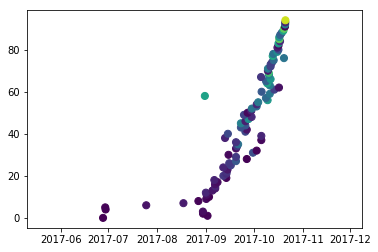

In [111]:
# Let's visualize activity on Athena: display the requests over time, also note unique student submissions.
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = [pd.to_datetime(d) for d in tutoringFrame.date_time_of_request]
# random.shuffle(x)
y = [f for f in tutoringFrame.student_first_name]

# tutoringFrame.plot(x='date_int', y='student_first_name', kind='scatter')

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(x)))
random.shuffle(colors)
# x.sort()

plt.scatter(x, y, s=50, c=colors)
plt.gray()

plt.show()


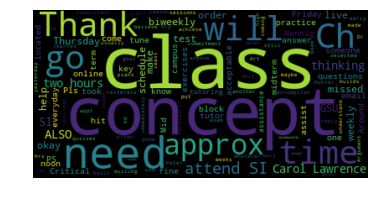

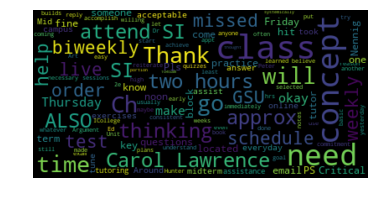

In [114]:
# Now, let's take a look at the word cloud for a subject
from wordcloud import WordCloud
BoW = [] # Create a bag of words

# Collect all the words in requests for math subjects
## Interactive: what subject would you like the word cloud for?
subject = ['phil']
for index, entry in tutoringFrame.iterrows():
    if (entry['subject']['shorthand'] in subject):
        BoW += entry['problem'].split()

BoW = ' '.join(BoW)
        
wc = WordCloud().generate(BoW)

# https://github.com/amueller/word_cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(BoW)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()